In [2]:
%%bash 
pip install arch
pip install numpy
pip install pandas
pip install seaborn
pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import os
import seaborn as sns
from scipy import stats
from mlxtend.evaluate import permutation_test

In [30]:
#A=pd.read_pickle("data/allyears-avg_plate.pkl")
A=pd.read_pickle("data/allyears.pkl")

In [31]:
# Permutation test for combined off-festival vs festival period
p_value = permutation_test( A.loc[A['festival'] == 'during', 'Bioindicator'] , 
                            A.loc[A['festival'] != 'during', 'Bioindicator'] , 
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

9.999000099990002e-05


In [12]:
A.query('festival != "during"').mean()

rooms               5636.720645
year                  17.900000
rain                   5.025000
Bioindicator          58.055556
Coliform             289.583333
total               1490.138889
week                   4.600000
Bioindicator UV+       9.722222
dtype: float64

In [37]:
for c in ['Bioindicator','Coliform']:
    p1 = permutation_test( A.loc[A['year'] == 16 , c] , 
                                A.loc[A['year'] == 17, c] , 
                               method='approximate',
                               num_rounds=10000,
                               seed=0)
    p2 = permutation_test( A.loc[A['year'] == 16 , c] , 
                                A.loc[A['year'] == 20, c] , 
                               method='approximate',
                               num_rounds=10000,
                               seed=0)
    p3 = permutation_test( A.loc[A['year'] == 17 , c] , 
                                A.loc[A['year'] == 20, c] , 
                               method='approximate',
                               num_rounds=10000,
                               seed=0)
    print(f"16vs17 = {p1}, 16vs20 = {p2}, 17vs20 = {p3} on {c}")

16vs17 = 9.999000099990002e-05, 16vs20 = 0.007099290070992901, 17vs20 = 9.999000099990002e-05 on Bioindicator
16vs17 = 0.7629237076292371, 16vs20 = 9.999000099990002e-05, 17vs20 = 9.999000099990002e-05 on Coliform


In [40]:
A.query('year == 16')['Coliform'].mean(), A.query('year == 17')['Coliform'].mean(), A.query('year == 20')['Coliform'].mean()

(124.30555555555556, 108.68055555555556, 644.4444444444445)

In [33]:
A.loc[(A['year']==16) & (A['festival'] == 'during'), 'Bioindicator']

18      0.0
19      0.0
20      0.0
21    500.0
22      0.0
23    250.0
24      0.0
25      0.0
26    250.0
27    550.0
28    425.0
29    300.0
30    800.0
31    900.0
32    825.0
33    125.0
34     50.0
35    175.0
Name: Bioindicator, dtype: float64

In [34]:
A.loc[(A['year']==17) & (A['festival'] == 'during'), 'Bioindicator']

27    250.0
28    250.0
29    275.0
30     25.0
31    175.0
32     75.0
33    325.0
34    200.0
35    275.0
36    300.0
37    200.0
38    200.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
Name: Bioindicator, dtype: float64

In [36]:
A.loc[(A['year']==17) & (A['festival'] == 'during'), 'Bioindicator UV+']

27    250.0
28    250.0
29    275.0
30     25.0
31    175.0
32     75.0
33    325.0
34    200.0
35    275.0
36    300.0
37    200.0
38    200.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
Name: Bioindicator UV+, dtype: float64

In [21]:
p_value = permutation_test( A.loc[(A['year']==16) & (A['festival'] == 'during'), 'Bioindicator'] , 
                            A.loc[(A['year']==17) & (A['festival'] == 'during'), 'Bioindicator'], 
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)
#0.35326467353264673 BUV+

0.35326467353264673


In [7]:
p_value = permutation_test( A.loc[(A['year']==16) & (A['festival'] == 'during'), 'Bioindicator'] , 
                            A.loc[(A['year']==16) & (A['festival'] != 'during'), 'Bioindicator'], 
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.0387961203879612


In [8]:
p_value = permutation_test( A.loc[(A['year']==17) & (A['festival'] == 'during'), 'Bioindicator'] , 
                            A.loc[(A['year']==17) & (A['festival'] != 'during'), 'Bioindicator'], 
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.0014998500149985001


In [41]:
main_vars=['Bioindicator', 'Coliform', 'Bioindicator UV+',  'total' ,'rain', 'rooms']
A[main_vars].corr(method ='spearman')

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.300159,0.834559,0.360940,0.123900,0.287612
Coliform,0.300159,1.000000,0.463321,0.785548,-0.029285,0.205608
Bioindicator UV+,0.834559,0.463321,1.000000,0.582578,-0.183682,0.226850
total,0.360940,0.785548,0.582578,1.000000,-0.053015,0.205720
rain,0.123900,-0.029285,-0.183682,-0.053015,1.000000,0.399218
rooms,0.287612,0.205608,0.226850,0.205720,0.399218,1.000000


In [42]:
def append_vars(ds, cols):
    v=ds[cols]
    X=ds.drop(columns=cols)
    return pd.concat([X.assign(cfu=ds[col], name=ds['year'].apply(lambda y: f"{col} {y}")) for col in cols]).dropna()

In [43]:
A2=append_vars(A, ['Bioindicator', 'Bioindicator UV+', 'Coliform', 'total'])

In [44]:
A.query('year==16')[main_vars].corr(method ='spearman')

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.463458,NaN,0.687153,0.319278,0.425990
Coliform,0.463458,1.000000,NaN,0.586674,0.000310,0.018802
Bioindicator UV+,NaN,NaN,NaN,NaN,NaN,NaN
total,0.687153,0.586674,NaN,1.000000,0.083664,0.152319
rain,0.319278,0.000310,NaN,0.083664,1.000000,0.893917
rooms,0.425990,0.018802,NaN,0.152319,0.893917,1.000000


In [45]:
A.query('year==17')[main_vars].corr(method ='spearman')

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.630557,0.834559,0.609393,-0.026901,0.250758
Coliform,0.630557,1.000000,0.463321,0.782111,-0.219374,0.439946
Bioindicator UV+,0.834559,0.463321,1.000000,0.582578,-0.183682,0.226850
total,0.609393,0.782111,0.582578,1.000000,-0.294689,0.562313
rain,-0.026901,-0.219374,-0.183682,-0.294689,1.000000,-0.013363
rooms,0.250758,0.439946,0.226850,0.562313,-0.013363,1.000000


In [14]:
A.query('year==20')[main_vars].corr(method ='spearman')

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.282178,NaN,0.313524,0.121148,0.261842
Coliform,0.282178,1.000000,NaN,0.808145,0.159472,0.508954
Bioindicator UV+,NaN,NaN,NaN,NaN,NaN,NaN
total,0.313524,0.808145,NaN,1.000000,0.292094,0.668511
rain,0.121148,0.159472,NaN,0.292094,1.000000,0.579178
rooms,0.261842,0.508954,NaN,0.668511,0.579178,1.000000


In [15]:
A[main_vars].corr(method ='spearman') 

,Bioindicator,Coliform,Bioindicator UV+,total,rain,rooms
Bioindicator,1.000000,0.413961,0.798730,0.479667,0.108622,0.321153
Coliform,0.413961,1.000000,0.332692,0.828321,-0.048135,0.240064
Bioindicator UV+,0.798730,0.332692,1.000000,0.579050,-0.160397,0.228377
total,0.479667,0.828321,0.579050,1.000000,-0.074906,0.223255
rain,0.108622,-0.048135,-0.160397,-0.074906,1.000000,0.399218
rooms,0.321153,0.240064,0.228377,0.223255,0.399218,1.000000


In [16]:
A2[['cfu', 'rooms', 'rain']].corr(method ='spearman')

,cfu,rooms,rain
cfu,1.000000,0.221528,-0.035081
rooms,0.221528,1.000000,0.345761
rain,-0.035081,0.345761,1.000000


In [17]:
def bootstrap_ci(df, variable, classes, repetitions = 1000, alpha = 0.05, random_state=None): 
    
    df = df[[variable, classes]]
    bootstrap_sample_size = len(df) 
    
    mean_diffs = []
    for i in range(repetitions):
            bootstrap_sample = df.sample(n = bootstrap_sample_size, replace = True, random_state = random_state)
            mean_diff = bootstrap_sample.groupby(classes).mean().iloc[1,0] - bootstrap_sample.groupby(classes).mean().iloc[0,0]
            mean_diffs.append(mean_diff)
    # confidence interval
    left = np.percentile(mean_diffs, alpha/2*100)
    right = np.percentile(mean_diffs, 100-alpha/2*100)
    # point estimate
    point_est = df.groupby(classes).mean().iloc[1,0] - df.groupby(classes).mean().iloc[0,0]
    print('Point estimate of difference between means:', round(point_est,2))
    print((1-alpha)*100,'%','confidence interval for the difference between means:', (round(left,2), round(right,2)))


In [69]:
A[['Bioindicator','rain']]

,Bioindicator,rain
0,200.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
67,100.0,1.8
68,300.0,1.8
69,0.0,1.8
70,0.0,1.8


In [71]:
import arch.data.frenchdata
from arch.bootstrap import StationaryBootstrap,IndependentSamplesBootstrap

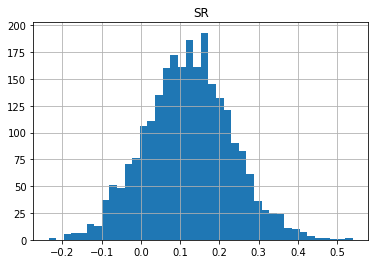

In [83]:
def foi(X):
    return X.corr(method ='spearman').iloc[0,1] #['cfu']['rain']
    
bs = StationaryBootstrap(12, A[['Bioindicator','rain']])
results = bs.apply(foi, 2500)
SR = pd.DataFrame(results[:, -1:], columns=["SR"])
fig = SR.hist(bins=40)


In [82]:
A[['Bioindicator','rain']].corr(method='spearman').iloc[0,1]

0.12390000604788295

In [99]:
l = SR.SR

total_size = len(SR.SR)
true = np.sum(l <0.12)

true/total_size

0.4904

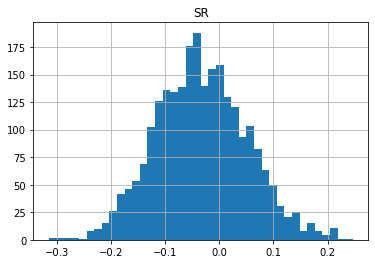

In [21]:
def foi(X):
    return X[['cfu', 'rooms', 'rain']].corr(method ='spearman')['cfu']['rain']
    
bs = StationaryBootstrap(12, A2)
results = bs.apply(foi, 2500)
SR = pd.DataFrame(results[:, -1:], columns=["SR"])
fig = SR.hist(bins=40)

In [22]:
ci = bs.conf_int(foi, 1000, method="percentile", reuse=True)
ci

/Users/kato/anaconda3/lib/python3.7/site-packages/arch/bootstrap/base.py:685: RuntimeWarning: The conditions to reuse the previous bootstrap has not been satisfied. A new bootstrap will be used.
  warnings.warn(warn, RuntimeWarning)


array([[-0.20008459],
       [ 0.1353287 ]])

## Bootstrap

In [ ]:
def boot_matrix(z, B):
    """Bootstrap sample
    
    Returns all bootstrap samples in a matrix"""
    
    n = len(z)  # sample size
    idz = np.random.randint(0, n, size=(B, n))  # indices to pick for all boostrap samples
    return z[idz]

def bootstrap_mean(x, B=10000, alpha=0.05, plot=False):
    """Bootstrap standard error and (1-alpha)*100% c.i. for the population mean
    
    Returns bootstrapped standard error and different types of confidence intervals"""
   
    # Deterministic things
    n = len(x)  # sample size
    orig = x.mean()  # sample mean
    se_mean = x.std()/np.sqrt(n) # standard error of the mean
    qt = stats.t.ppf(q=1 - alpha/2, df=n - 1) # Student quantile
    
    # Generate boostrap distribution of sample mean
    xboot = boot_matrix(x, B=B)
    sampling_distribution = xboot.mean(axis=1)
   
   # Standard error and sample quantiles
    se_mean_boot = sampling_distribution.std()
    quantile_boot = np.percentile(sampling_distribution, q=(100*alpha/2, 100*(1-alpha/2)))
 
    # RESULTS
    print("Estimated mean:", orig)
    print("Classic standard error:", se_mean)
    print("Classic student c.i.:", orig + np.array([-qt, qt])*se_mean)
    print("\nBootstrap results:")
    print("Standard error:", se_mean_boot)
    print("t-type c.i.:", orig + np.array([-qt, qt])*se_mean_boot)
    print("Percentile c.i.:", quantile_boot)
    print("Basic c.i.:", 2*orig - quantile_boot[::-1])

    if plot:
        plt.hist(sampling_distribution, bins="fd")

In [23]:
def mean_diff(x, y):
    return x.mean() - y.mean()

bs = IndependentSamplesBootstrap(A.loc[A['year'] == 16], A.loc[A['year'] == 20])
print(bs.conf_int(mean_diff, method="studentized"))


StudentizationError: 
The estimated covariance computed in the studentication is numerically 0.
This might occur if your statistic has no variation. It is not possible to
apply the studentized bootstrap if any of the variances the values returned
by func have not variability when resampled. The estimated covariance
is:

 [[6.09003938e+05 0.00000000e+00 4.05197396e+02 1.44864454e+04
  3.80442704e+04 2.58022158e+05 4.02730564e+02            nan]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00            nan]
 [4.05197396e+02 0.00000000e+00 1.20137112e+00 1.89703409e+01
  3.85232060e-01 1.19202958e+02 1.74850725e-01            nan]
 [1.44864454e+04 0.00000000e+00 1.89703409e+01 2.85057591e+03
  2.97990400e+03 1.27440394e+04 2.54599447e+00            nan]
 [3.80442704e+04 0.00000000e+00 3.85232060e-01 2.97990400e+03
  2.19226485e+04 7.36443613e+04 1.36616522e+01            nan]
 [2.58022158e+05 0.00000000e+00 1.19202958e+02 1.27440394e+04
  7.36443613e+04 3.70711246e+05 9.70945622e+01            nan]
 [4.02730564e+02 0.00000000e+00 1.74850725e-01 2.54599447e+00
  1.36616522e+01 9.70945622e+01 3.78825688e-01            nan]
 [           nan            nan            nan            nan
             nan            nan            nan            nan]]
